# Contoh Implementasi Algoritma Support Vector Machine (SVM)

Berikut adalah langkah-langkah sederhana yang dilakukan dalam membangun suatu model SVM dan kemudian memprakirakan kategori dari suatu nilai baru berdasarkan model yang telah dibangun.

Sebagai pengingat, bahwa SVM membangun suatu model yang berbentuk hyperplane (bangun yang memiliki dimensi satu di bawah dimensi ruang vektor data, seperti bidang di ruang 3 dimensi) dari vektor-vektor yang dibentuk oleh data masukan.

Pada program ini, modul pembelajaran mesin yang dipakai adalah `scikit-learn` (yang dipanggil dengan nama `sklearn`), yang memiliki fungsi-fungsi untuk pembelajaran mesin sederhana, seperti regresi linear, SVM (*Support Vector Machine*), dan KNN (*k-Nearest Neighbor*).

Selain `scikit-learn`, juga terdapat modul lain untuk menunjang kinerja program seperti `numpy` untuk pemrosesan larik (array) dan `pandas` untuk analisis data, `matplotlib` untuk penampilan, dan `kagglehub` untuk mengunduh dataset dar Kaggle, salah satu platform pembelajaran mesin terpopuler.

**Hal yang dituliskan pertama kali dalam sebuah program Python adalah pemuatan modul yang diperlukan**

In [1]:
# Memuat modul (library) yang diperlukan
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
import kagglehub

**Kemudian, data masukan perlu didefinisikan**. Untuk mendefinsikan data masukan, dapat dilakukan baik secara manual maupun mengunduh data yang telah disiapkan.
**Kode di bawah mengunduh data dari Kaggle dengan `kagglehub` API**, yang kemudian diubah menjadi suatu objek bertipe `DataFrame` yang disediakan oleh `Pandas`.

Dataset sumber dapat dilihat di [sini](https://www.kaggle.com/datasets/rabieelkharoua/students-performance-dataset).

**Data (kolom) yang diperlukan akan diekstrak** dari objek `DataFrame` tersebut.

In [2]:
# Mengunduh dataset dar Kaggle
path = kagglehub.dataset_download("rabieelkharoua/students-performance-dataset", path="Student_performance_data _.csv")

# Lepas tanda pagar pada garis di bawah jika ingin melihat lokasi penyimpanan dataset
#print("Path to dataset files:", path)

#Memuat file hasil unduhan menjadi objek DataFrame oleh Pandas
inputData = pd.read_csv(path)

x = inputData[["StudyTimeWeekly", "Absences"]].to_numpy()
y = inputData["GradeClass"].astype('int').to_numpy()

100%|██████████| 163k/163k [00:00<00:00, 22.3MB/s]


Untuk melihat data masukan yang akan diproses, **nama variabel yang berisi data tersebut dapat ditulis secara langsung** dalam sebuah cell kode di sebuah Jupyter Notebook (file berekstensi `.ipynb` yang saat ini dilihat)

In [3]:
# Melihat sekilas nilai x
x

array([[19.83372281,  7.        ],
       [15.40875606,  0.        ],
       [ 4.21056977, 26.        ],
       ...,
       [ 6.80549964, 20.        ],
       [12.41665266, 17.        ],
       [17.81990749, 13.        ]])

In [4]:
# Melihat sekilas nilai y
y

array([2, 1, 4, ..., 2, 1, 1])



---



Untuk membangun suatu model yang baik, data masukan harus dipisah menjadi data pelatihan (*training*) dan pengujian (*testing*). Hal ini dilakukan agar model yang dibentuk oleh data pelatihan dapat diuji oleh data pengujian yang terpisah dari data pelatihan.

(*Untuk algoritma dan data yang lebih kompleks, pengkhususan data untuk validasi akan sangat membantu proses pelatihan*)

In [5]:
# Memisahkan data untuk pelatihan dan pengujian
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

Untuk membangun sebuah model KNN dengan `scikit-learn` (atau `sklearn`), sebuah variabel **model didefinisikan dengan fungsi `SVC()`** dari submodul `sklearn.svm`

Hal yang berikutnya dilakukan adalah **memasangkan (*fit*) model kepada data masukan** yang telah didefinisikan.

In [6]:
# Create and train the SVM
svm = SVC(kernel='linear')
svm.fit(x_train, y_train)

SVC(kernel='linear')



---



Kemudian, untuk menguji sebuah model, hal yang dilakukan adalah memasukkan nilai pengujian untuk variabel independen, dan mengamati hasil prediksi dari data yang dimasukkan tersebut dan membandingkannya dengan nilai yang dimiliki.

In [7]:
comparison = pd.DataFrame({'StudyTimeWeekly': x_test[:, 0], 'Absences': x_test[:, 1], 'GradeClass': y_test, 'Prediction': svm.predict(x_test)})
comparison

,StudyTimeWeekly,Absences,GradeClass,Prediction
0,0.135763,17.0,4,4
1,1.989925,0.0,1,2
2,10.588715,15.0,2,4
3,16.208658,1.0,0,1
4,3.576821,27.0,4,4
...,...,...,...,...
474,8.412605,16.0,4,4
475,3.170405,12.0,3,4
476,5.141922,5.0,3,2
477,10.281614,10.0,2,3


In [8]:
# Memprediksi nilai hasil (y) baru dari sepasang nilai baru untuk variabel independen
x1_baru = float(input("Masukkan data jam belajar (StudyTimeWeekly)\t:"))
x2_baru = int(input("Masukkan data banyak ketidakhadiran (Absences)\t:"))
x_baru = np.array([[x1_baru, x2_baru]])
y_baru = svm.predict(x_baru)
print("Prediction:", int(y_baru[0]))

Masukkan data jam belajar (StudyTimeWeekly)	:15
Masukkan data banyak ketidakhadiran (Absences)	:5
Prediction: 2




---



Untuk mempermudah visualisasi, maka data masukan dan model hasil dapat ditampilkan dalam sebuah grafik dengan menggunakan modul `matplotlib`.

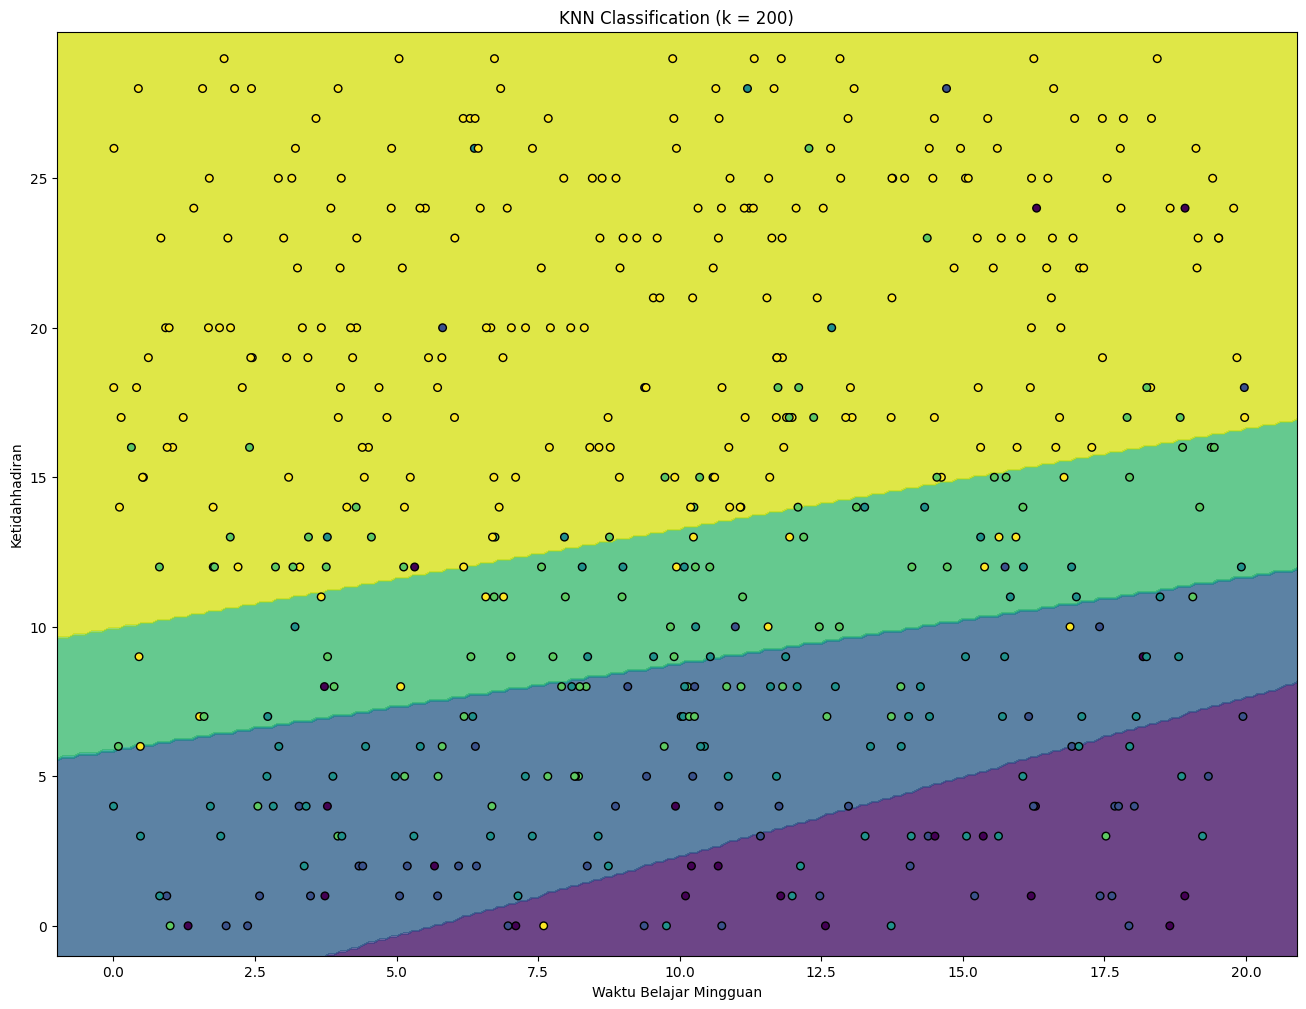

In [9]:
# Membuat suatu meshgrid untuk menghitung batasan wilayah keputusan
x_min, x_max = x[:, 0].min() - 1, x[:, 0].max() + 1
y_min, y_max = x[:, 1].min() - 1, x[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.1),
                     np.arange(y_min, y_max, 0.1))

# Memprakira kategori yang berada di meshgrid
Z = svm.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)

# Membuat plot
plt.figure(figsize=(16, 12))
plt.contourf(xx, yy, Z, alpha=0.8)  # Batasan wilayah keputusan
plt.scatter(x_test[:, 0], x_test[:, 1], c=y_test, edgecolor='k', s=30) # Titik data pengujian
plt.xlim(xx.min(), xx.max())
plt.ylim(yy.min(), yy.max())
plt.title("Support Vector Machine dengan Kernel Linear")
plt.xlabel("Waktu Belajar Mingguan")
plt.ylabel("Ketidahhadiran")

plt.show()

# Setelah mendapatkan hasil berupa model dan prediksi, maka yang harus dilakukan adalah menyimpulkan hasil yang didapat tersebut, sesuai dengan konteks data yang dimasukkan.

Untuk kesimpulan, kalian harus membuatnya sendiri